
Lambda School Data Science

*Unit 2, Sprint 3, Module 4*

---

# Model Interpretation

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Continue to iterate on your project: data cleaning, exploratory visualization, feature engineering, modeling.
- [ ] Make at least 1 partial dependence plot to explain your model.
- [ ] Make at least 1 Shapley force plot to explain an individual prediction.
- [ ] **Share at least 1 visualization (of any type) on Slack!**

If you aren't ready to make these plots with your own dataset, you can practice these objectives with any dataset you've worked with previously. Example solutions are available for Partial Dependence Plots with the Tanzania Waterpumps dataset, and Shapley force plots with the Titanic dataset. (These datasets are available in the data directory of this repository.)

Please be aware that **multi-class classification** will result in multiple Partial Dependence Plots (one for each class), and multiple sets of Shapley Values (one for each class).

## Stretch Goals

#### Partial Dependence Plots
- [ ] Make multiple PDPs with 1 feature in isolation.
- [ ] Make multiple PDPs with 2 features in interaction. 
- [ ] Use Plotly to make a 3D PDP.
- [ ] Make PDPs with categorical feature(s). Use Ordinal Encoder, outside of a pipeline, to encode your data first. If there is a natural ordering, then take the time to encode it that way, instead of random integers. Then use the encoded data with pdpbox. Get readable category names on your plot, instead of integer category codes.

#### Shap Values
- [ ] Make Shapley force plots to explain at least 4 individual predictions.
    - If your project is Binary Classification, you can do a True Positive, True Negative, False Positive, False Negative.
    - If your project is Regression, you can do a high prediction with low error, a low prediction with low error, a high prediction with high error, and a low prediction with high error.
- [ ] Use Shapley values to display verbal explanations of individual predictions.
- [ ] Use the SHAP library for other visualization types.

The [SHAP repo](https://github.com/slundberg/shap) has examples for many visualization types, including:

- Force Plot, individual predictions
- Force Plot, multiple predictions
- Dependence Plot
- Summary Plot
- Summary Plot, Bar
- Interaction Values
- Decision Plots

We just did the first type during the lesson. The [Kaggle microcourse](https://www.kaggle.com/dansbecker/advanced-uses-of-shap-values) shows two more. Experiment and see what you can learn!

### Links

#### Partial Dependence Plots
- [Kaggle / Dan Becker: Machine Learning Explainability — Partial Dependence Plots](https://www.kaggle.com/dansbecker/partial-plots)
- [Christoph Molnar: Interpretable Machine Learning — Partial Dependence Plots](https://christophm.github.io/interpretable-ml-book/pdp.html) + [animated explanation](https://twitter.com/ChristophMolnar/status/1066398522608635904)
- [pdpbox repo](https://github.com/SauceCat/PDPbox) & [docs](https://pdpbox.readthedocs.io/en/latest/)
- [Plotly: 3D PDP example](https://plot.ly/scikit-learn/plot-partial-dependence/#partial-dependence-of-house-value-on-median-age-and-average-occupancy)

#### Shapley Values
- [Kaggle / Dan Becker: Machine Learning Explainability — SHAP Values](https://www.kaggle.com/learn/machine-learning-explainability)
- [Christoph Molnar: Interpretable Machine Learning — Shapley Values](https://christophm.github.io/interpretable-ml-book/shapley.html)
- [SHAP repo](https://github.com/slundberg/shap) & [docs](https://shap.readthedocs.io/en/latest/)

In [ ]:
#%%capture
#import sys

# If you're on Colab:
#if 'google.colab' in sys.modules:
   # DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install pdpbox
    !pip install shap

# If you're working locally:
#else:
    #DATA_PATH = '../data/'

In [2]:
import pandas as pd
import numpy as np
avocado= pd.read_csv('../avocado.csv')

In [3]:
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
avocado.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [5]:
avocado['type'].value_counts(normalize=True)

conventional    0.500082
organic         0.499918
Name: type, dtype: float64

In [6]:
import seaborn as sns
sns.boxplot(y="type", x="AveragePrice", data=avocado, palette = 'pink')

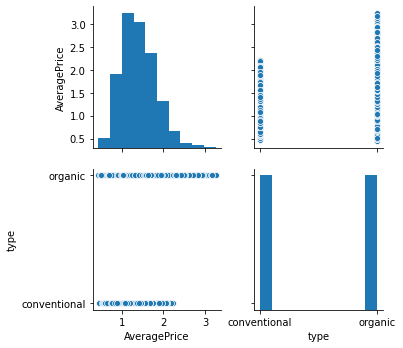

In [7]:
sns.pairplot(avocado, vars=['AveragePrice','type'])

In [8]:
avocado['Total_avo_sold'] = avocado['4046']+avocado['4225']+avocado['4770']

In [9]:
avocado_df = avocado.drop(columns=['Date','4046','4225','4770','Unnamed: 0'])
avocado_df

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Total_avo_sold
0,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,55539.75
1,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,45371.42
2,0.93,118220.22,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,110074.87
3,1.08,78992.15,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,73180.99
4,1.28,51039.60,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,44855.65
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,3576.16
18245,1.71,13888.04,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,4623.20
18246,1.87,13766.76,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,4372.65
18247,1.93,16205.22,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,5235.68


In [10]:
avocado_df['type'] = avocado_df['type'].astype('category')

In [11]:
avocado_df['type']= avocado_df['type'].cat.codes

In [12]:
avocado_df['type'].head()

0    0
1    0
2    0
3    0
4    0
Name: type, dtype: int8

In [13]:
#Split train into test and val
from sklearn.model_selection import train_test_split
train, test = train_test_split(avocado_df, train_size=0.85, test_size=0.15, 
                              stratify=avocado['type'], random_state=42)
train.shape,test.shape

((15511, 10), (2738, 10))

In [14]:
#Split train into train and val
train,val=train_test_split(train, train_size=0.85, test_size=0.15, 
                              stratify=train['type'], random_state=42)
train.shape,val.shape

((13184, 10), (2327, 10))

In [15]:
train.head()

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Total_avo_sold
8356,1.23,35182320.78,12151894.06,9399104.79,2544942.74,207846.53,0,2017,TotalUS,23030426.72
15595,1.62,14161.90,13700.40,13700.40,0.00,0.00,1,2017,HarrisburgScranton,461.50
15203,1.95,57024.53,3685.71,3685.71,0.00,0.00,1,2017,Chicago,53338.82
11361,1.18,22630.58,426.67,426.67,0.00,0.00,1,2015,SanFrancisco,22203.91
11253,1.22,13195.65,467.34,467.34,0.00,0.00,1,2015,Sacramento,12728.31


In [16]:
#Assigning target/features columns
target='type'
features = train.drop(columns=[target]).columns.tolist()
# Arrange data into X features matrix and y target vector 
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test=test[target]

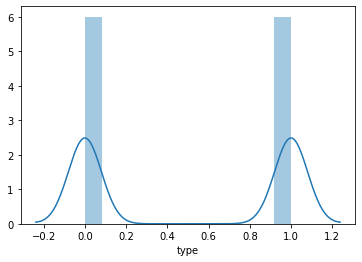

In [17]:
sns.distplot(y_train);

In [18]:
from sklearn.linear_model import LogisticRegression
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder



pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler(),
    LogisticRegression(random_state = 42)
)

pipeline.fit(X_train, y_train)

print('Train Accuracy', pipeline.score(X_train, y_train))
print('Val Accuracy', pipeline.score(X_val, y_val))

Train Accuracy 0.9114077669902912
Val Accuracy 0.9114740008594757


C:\Users\subir\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [19]:
# random forest classifier

import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder


rf= make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(random_state = 42)
)

rf.fit(X_train, y_train)

print('Train Accuracy', rf.score(X_train, y_train))
print('Val Accuracy', rf.score(X_val, y_val))


Train Accuracy 0.9990898058252428
Val Accuracy 0.9871078642028362


C:\Users\subir\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [20]:
rf.named_steps['randomforestclassifier'].feature_importances_

array([0.05135405, 0.38231443, 0.1013501 , 0.03375323, 0.0406834 ,
       0.04199951, 0.01029662, 0.04404733, 0.29420133])

In [21]:
from sklearn.metrics import roc_auc_score
y_pred_proba = pipeline.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred_proba)

0.9734378739661913

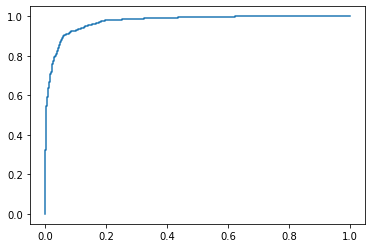

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
plt.plot(fpr, tpr)

In [ ]:
#Partial Dependence plot

In [23]:
# Later, when you save matplotlib images to include in blog posts or web apps,
# increase the dots per inch (double it), so the text isn't so fuzzy
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 72

In [38]:
conda config --add channels conda-forge


Note: you may need to restart the kernel to use updated packages.


In [39]:
conda install pdpbox

Solving environment: ...working... 
  - anaconda/win-64::openssl-1.1.1d-he774522_2
  - defaults/win-64::openssl-1.1.1d-he774522_2done

## Package Plan ##

  environment location: C:\Users\subir\Anaconda3

  added / updated specs:
    - pdpbox


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    matplotlib-base-3.2.1      |   py37h911224e_0         7.1 MB  conda-forge
    pdpbox-0.2.0               |             py_0        55.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:        62.3 MB

The following NEW packages will be INSTALLED:

  matplotlib-base    conda-forge/win-64::matplotlib-base-3.2.1-py37h911224e_0
  pdpbox             conda-forge/noarch::pdpbox-0.2.0-py_0

The following packages will be UPDATED:

  conda                        anaconda::conda-4.8.3-py37_0 --> conda-forge::conda-4.8.3-py37hc8df

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename C:\Users\subir\Anaconda3\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans.ttf.  Please remove this file manually (you may need to reboot to free file handles)


In [24]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'AveragePrice'

isolated = pdp_isolate(
    model=rf,
    dataset=X_val,
    model_features=X_val.columns,
    feature=feature
)

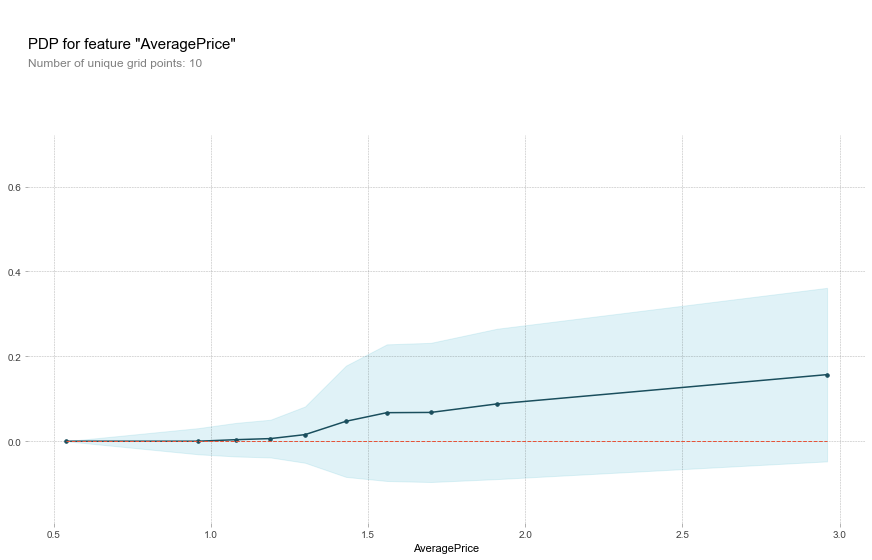

In [25]:
pdp_plot(isolated, feature_name=feature);

In [28]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'AveragePrice'

isolated = pdp_isolate(
    model=rf,
    dataset=X_val,
    model_features=X_val.columns,
    feature=feature,
    num_grid_points=50
)

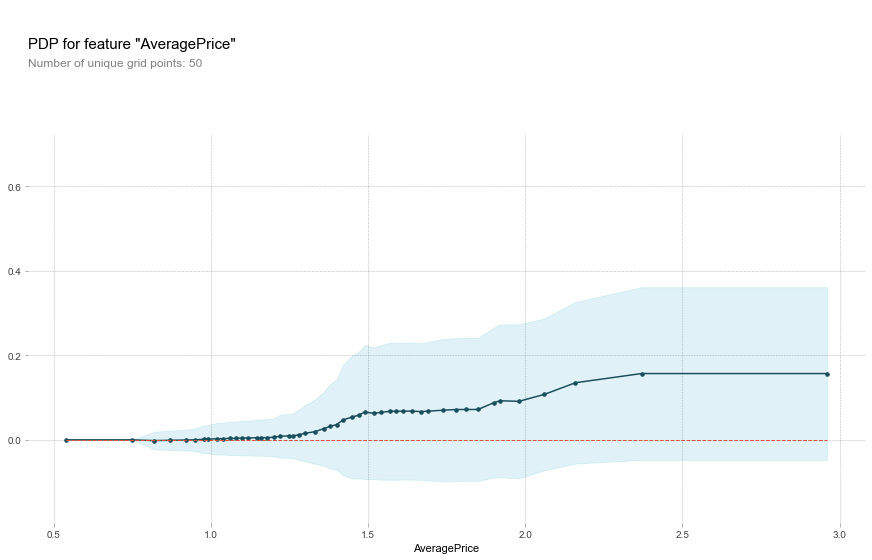

In [29]:
pdp_plot(isolated, feature_name=feature);

In [16]:
val.shape

(2327, 14)

In [1]:
100/2327

0.042973785990545764

(0.5, 3.0)

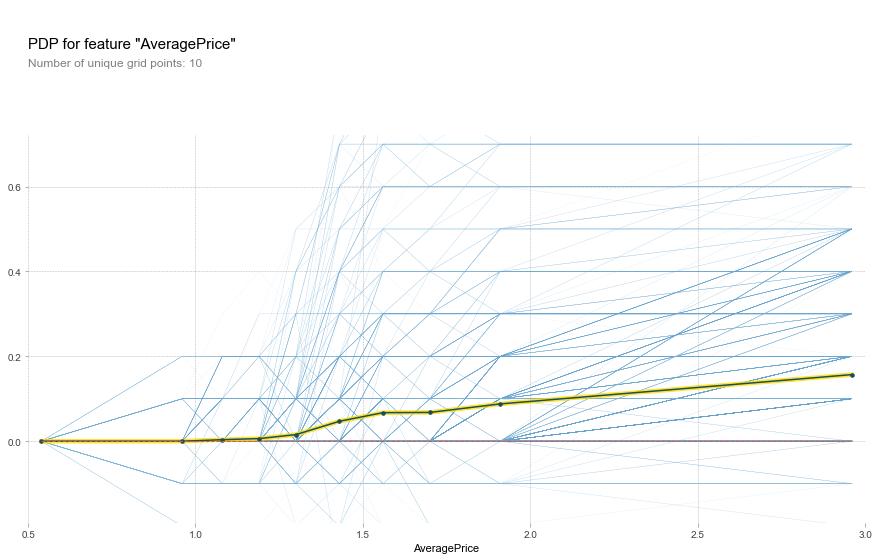

In [31]:
pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=0.50);
plt.xlim([0.5, 3])

In [ ]:
#Partial Dependence Plots with 2 features

In [32]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['AveragePrice', 'Total Bags']

interaction = pdp_interact(
    model=rf,
    dataset=X_val,
    model_features=X_val.columns,
    features=features
)

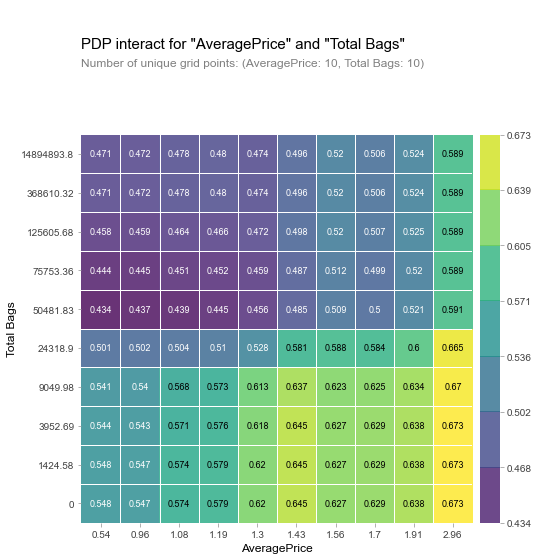

In [33]:
pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

In [25]:
conda install -c conda-forge shap

Solving environment: ...working... 
  - anaconda/win-64::openssl-1.1.1d-he774522_2
  - defaults/win-64::openssl-1.1.1d-he774522_2done

## Package Plan ##

  environment location: C:\Users\subir\Anaconda3

  added / updated specs:
    - shap


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    shap-0.35.0                |   py37h3bbf574_0         395 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         395 KB

The following NEW packages will be INSTALLED:

  shap               conda-forge/win-64::shap-0.35.0-py37h3bbf574_0




shap-0.35.0          | 395 KB    |            |   0% 
shap-0.35.0          | 395 KB    | 4          |   4% 
shap-0.35.0          | 395 KB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... do

In [30]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

processor = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_processed = processor.fit_transform(X_train)
X_val_processed = processor.transform(X_val)

eval_set = [(X_train_processed, y_train), 
            (X_val_processed, y_val)]

model = XGBClassifier(n_estimators=1000, n_jobs=-1)
model.fit(X_train_processed, y_train, eval_set=eval_set, eval_metric='auc', 
          early_stopping_rounds=10)

[0]	validation_0-auc:0.980499	validation_1-auc:0.981638
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.989009	validation_1-auc:0.986631
[2]	validation_0-auc:0.992597	validation_1-auc:0.989544
[3]	validation_0-auc:0.992763	validation_1-auc:0.989684
[4]	validation_0-auc:0.992955	validation_1-auc:0.98973
[5]	validation_0-auc:0.992973	validation_1-auc:0.989874
[6]	validation_0-auc:0.993842	validation_1-auc:0.991395
[7]	validation_0-auc:0.993788	validation_1-auc:0.991383
[8]	validation_0-auc:0.993957	validation_1-auc:0.991631
[9]	validation_0-auc:0.994039	validation_1-auc:0.991644
[10]	validation_0-auc:0.994402	validation_1-auc:0.992026
[11]	validation_0-auc:0.994673	validation_1-auc:0.992476
[12]	validation_0-auc:0.99482	validation_1-auc:0.992757
[13]	validation_0-auc:0.994704	validation_1-auc:0.992016
[14]	validation_0-auc:0.995007	validation_1-auc:0.992927


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [31]:
# THIS CELL ISN'T ABOUT THE NEW OBJECTIVES FOR TODAY
# BUT IT IS IMPORTANT FOR YOUR SPRINT CHALLENGE

from sklearn.metrics import roc_auc_score
X_test_processed = processor.transform(X_test)
class_index = 1
y_pred_proba = model.predict_proba(X_test_processed)[:, class_index]
print(f'Test ROC AUC for class {class_index}:')
print(roc_auc_score(y_test, y_pred_proba)) # Ranges from 0-1, higher is better

Test ROC AUC for class 1:
0.999925299907532


In [32]:
# To explain the prediction for test observation with index #3094, 
# first, get all of the features for that observation
row = X_test.iloc[[2695]]
row

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Total_avo_sold
3775,0.68,1378761.67,300936.48,125723.56,165911.25,9301.67,2016,Houston,1077825.19


In [33]:
# STUDY/PRACTICE THIS CELL FOR THE SPRINT CHALLENGE
import shap

explainer = shap.TreeExplainer(model)
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row, 
    link='logit' # For classification, this shows predicted probabilities
)

In [36]:
feature_names = row.columns
feature_values=row.values[0]
shap_values[0]
shaps=pd.Series(shap_values[0],zip(feature_names,feature_values))
shaps

(AveragePrice, 0.68)           -1.206736
(Total Volume, 1378761.67)     -0.570378
(Total Bags, 300936.48)         0.540025
(Small Bags, 125723.56)        -0.216079
(Large Bags, 165911.25)         0.652556
(XLarge Bags, 9301.67)         -3.072297
(year, 2016)                    0.006972
(region, Houston)              -1.519029
(Total_avo_sold, 1077825.19)   -6.083311
dtype: float32